# Image I/O: Reading and Writing Images

**Goal:** Demonstrate how to read and write image files via pyimagej

**Suggested use cases:**

- using python to script image type conversions
- use `ij.io().save()` to save files

**Notebook layout:**

1. Open a couple images
2. Open a video (avi)

In [3]:
import imagej
ij = imagej.init('sc.fiji:fiji:2.1.1')

## Open files with `ij.io().open()`

Images are imported as `net.imagej.DefaultDataet` type. Images can then be converted to a python object with `ij.py.from_java()`, resulting in a `xarray.core.dataarray.DataArray` object.

[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata


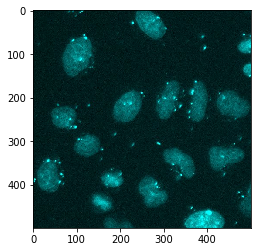

img_jpg type: <java class 'net.imagej.DefaultDataset'>
img_jpg_py type: <class 'xarray.core.dataarray.DataArray'>


In [3]:
img_jpg = ij.io().open('example_images/example_jpg.jpg')
img_jpg_py = ij.py.from_java(img_jpg)
ij.py.show(img_jpg_py)
print('img_jpg type: {}'.format(type(img_jpg)))
print('img_jpg_py type: {}'.format(type(img_jpg_py)))

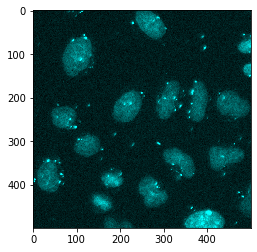

img_png type: <java class 'net.imagej.DefaultDataset'>
img_png_py type: <class 'xarray.core.dataarray.DataArray'>


In [4]:
img_png = ij.io().open('example_images/example_png.png')
img_png_py = ij.py.from_java(img_png)
ij.py.show(img_png_py)
print('img_png type: {}'.format(type(img_png)))
print('img_png_py type: {}'.format(type(img_png_py)))

[java.lang.Enum.toString] 00:06:50.666 [main] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:70)
	at org.scijava.io.IOService.getOpener(IOService.java:52)
	at org.scijava.io.DefaultIOService.open(Defa

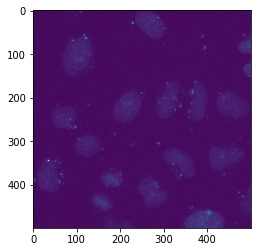

img_tif type: <java class 'net.imagej.DefaultDataset'>
img_tif_py type: <class 'xarray.core.dataarray.DataArray'>


In [11]:
img_tif = ij.io().open('example_images/example_tif.tif')
img_tif_py = ij.py.from_java(img_tif)
ij.py.show(img_tif)
print('img_tif type: {}'.format(type(img_tif)))
print('img_tif_py type: {}'.format(type(img_tif_py)))

### Timelapse and video files

Now lets try opening videos and time series stack images.

In [4]:
# open an avi video and save as a stack
vid_avi = ij.io().open('example_images/t1-rendering.avi')
vid_avi_py = ij.py.from_java(vid_avi)

[java.lang.Enum.toString] 13:18:57.227 [main] DEBUG org.scijava.nativelib.BaseJniExtractor - Deleting leftover folder: /tmp/nativelib-loader_3489563097793247230
[java.lang.Enum.toString] 13:18:57.229 [main] DEBUG org.scijava.nativelib.NativeLibraryUtil - processor is INTEL_64 os.arch is amd64
[java.lang.Enum.toString] 13:18:57.230 [main] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is LINUX_64 os.name is linux
[java.lang.Enum.toString] 13:18:57.230 [main] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is LINUX_64 os.name is linux
[java.lang.Enum.toString] 13:18:57.230 [main] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is natives/linux_64/
[java.lang.Enum.toString] 13:18:57.230 [main] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.so
[java.lang.Enum.toString] 13:18:57.230 [main] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find resource natives/linux_64/libturbojpeg.so
[java.lang.Enum.toString]

We can't naively view the video inside of the jupyter notebook, however we can still check it's there by converting it into a python object and printing the `xarray` object.

In [6]:
print(vid_avi_py.shape)

(36, 3, 218, 206)


In [9]:
np.mean(vid_avi_py)

<xarray.DataArray ()>
array(78.144535)

Now let's save this as a tif stack. We can do this with `ij.io().save()`.

In [10]:
ij.io().save(vid_avi, 'avi_to_tif.tif')